## K-MEAN

In [1]:
file_path = "C:\\Users\\cho03\\Downloads\\세미나\\방학 세미나\\" # data 저장 경로

In [2]:
import itertools # 반복 객체를 유용하게 다루는 라이브러리
import re  # 정규표현식을 사용할 수 있는 라이브러리
from sklearn.feature_extraction.text import TfidfVectorizer  # tf-idf값을 구하기 위해서 사용
from collections import defaultdict # 딕셔너리 기본값을 설정할 수 있는 라이브러리
from collections import Counter   # 단어들을 쉽게 집계하는 라이브러리
from wordcloud import WordCloud # Word Cloud를 만들기 위한
import matplotlib
import matplotlib.pyplot as plt   # 시각화하는 라이브러리
from IPython.display import set_matplotlib_formats
from gensim import corpora, models # 토픽 모델링을 위한 라이브러리
set_matplotlib_formats('retina')   # 선명하게 시각화
font_path = file_path + 'font\\Nanum_Gothic\\NanumGothic-Bold.ttf'  # 폰트 경로 지정
from sklearn.cluster import KMeans # KMeans 군집화 알고리즘을 사용하는 라이브러리
from tqdm import tqdm_notebook # progress bar
from tqdm import tqdm # 진행률 피드백 라이브러리
from matplotlib import rc, font_manager
import seaborn as sns
rc('font', family='Malgun Gothic') # 한글 폰트 설정
import pickle
import pandas as pd

C:\Users\cho03\AppData\Local\Temp\ipykernel_18456\2925494364.py:11: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('retina')   # 선명하게 시각화


In [3]:
f = open(file_path + 'total_doc.pkl', "rb") # 데이터 불러오기
data = pickle.load(f)
f.close() # 파일 닫기

### 본문 k-mean

In [4]:
doc_noun = []
for i in range(0,len(data['doc_token_noun'])):
    # data['doc_token_noun'][i]에서 추출한 명사를 하나의 문자열로 연결 후 doc_noun 리스트에 추가
    doc_noun.append(' '.join(data['doc_token_noun'][i]))  # 각 문서의 명사들을 str으로 연결     
    #['문서1 명사', '문서2 명사', '...']

In [5]:
# 텍스트 문서 모음을 단어 tf-idf 행렬로 변환 
vec = TfidfVectorizer(min_df = 0.01, max_df=0.95) # 문서의 1%~95%로 나타나는 단어만 고려.  #min_df: 특정 단어가 나타나는 '문서의 수의 최소 빈도값을 설정/소수형태면 %로 설정
X = vec.fit_transform(doc_noun) # 설정한 Vectorizer로 벡터화

In [6]:
print(vec.get_feature_names_out()) # tf-idf 행렬 추출

['10' '100' '10년' ... '흥미' '희망' '희생']


In [7]:
print(X)  # (문서인덱스, 등장단어인덱스) tf-idf값

  (0, 953)	0.051337230611226886
  (0, 1879)	0.0370514738538438
  (0, 1205)	0.049571963300302335
  (0, 1436)	0.027030348438224206
  (0, 596)	0.04121973603569758
  (0, 1893)	0.03921739577590161
  (0, 1759)	0.07144443952445316
  (0, 780)	0.04836666402104457
  (0, 1895)	0.03050207064624481
  (0, 1829)	0.05059058464677991
  (0, 1470)	0.06018933102784364
  (0, 2049)	0.044305975788442815
  (0, 812)	0.033353674614838055
  (0, 126)	0.037659099439065244
  (0, 1135)	0.037393827682756314
  (0, 1012)	0.051337230611226886
  (0, 1097)	0.020337771683557427
  (0, 259)	0.038405745403512215
  (0, 803)	0.03443118977540601
  (0, 1810)	0.03572221976222658
  (0, 840)	0.029704311705745483
  (0, 1422)	0.04989929845781682
  (0, 1114)	0.03346743327825017
  (0, 1770)	0.043601634181267106
  (0, 765)	0.018284321926633824
  :	:
  (2166, 624)	0.04941716491743594
  (2166, 251)	0.08430377033248579
  (2166, 1235)	0.07322455314900024
  (2166, 2135)	0.042399965722379765
  (2166, 748)	0.10144453059022172
  (2166, 2141)	0.0

c:\Users\cho03\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\cho03\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1366: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(


1
2
3
4
5
6
7
8
9


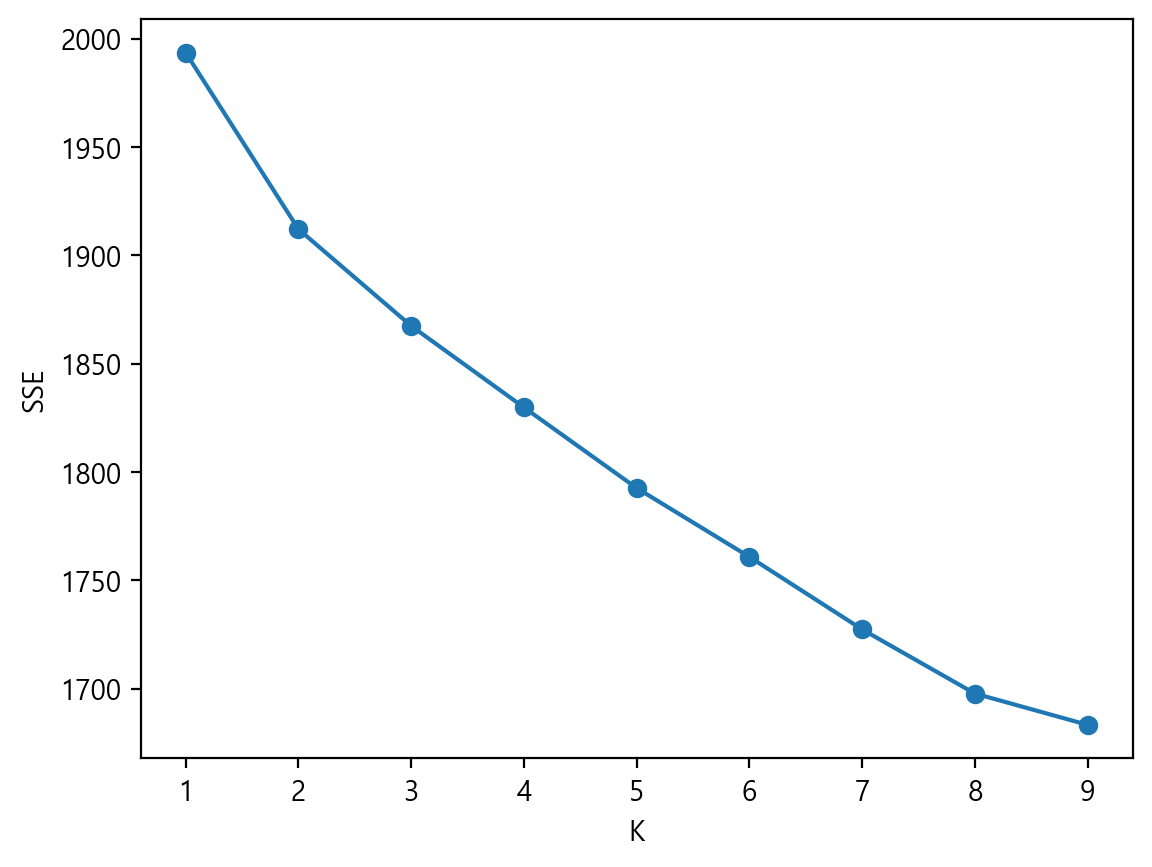

In [8]:
# 군집수가 1~9개일때로 elbow 그래프 시각화
def elbow(X):
    sse = []  # sse 값을 저장할 리스트

    for i in range(1,10):
        km = KMeans(n_clusters=i, algorithm='auto', random_state=1)  #k-means algorithm: auto(기본값))
        km.fit(X) # k-means 군집화 수행
        sse.append(km.inertia_)  # sse 값을 리스트에 추가
        print(i) # 현재 i 출력(진행 상황 확인용)

    # Elbow 그래프 시각화    
    plt.plot(range(1,10), sse, marker='o')
    plt.xlabel('K') # K 값 (클러스터 수)
    plt.ylabel('SSE') # see 값
    plt.xticks(range(1,10))
    plt.show()

elbow(X)

In [9]:
# 최적의 클러스터 수(4)로 k-means 실행
from sklearn.cluster import KMeans
model = KMeans(n_clusters=4, algorithm='auto', random_state=0) # K-means 모델 생성, 클러스터 수를 4로 설정
model.fit(X)  # K-means 군집화 수행

KMeans(algorithm='auto', n_clusters=4, random_state=0)

In [10]:
print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]   # 군집 중심의 단어들을 내림차순으로 정렬하여 인덱스 반환
for i in range(4): # 4개의 클러스터에 대해 반복
    print("Cluster %d:" % i) # 현재 클러스터 번호 출력
    for ind in order_centroids[i, :100]:   # [행, 열]     # [클러스터 인덱스, 클러스터 내 인덱스] 
        print(' %s' % terms[ind])   # ind: 가져온 단어 인덱스    #terms[ind]: 해당 인덱스를 가진 단어
    print('\n')

Top terms per cluster:
Cluster 0:
 급여
 가구
 신청
 소득
 복지
 재산
 수급
 생계
 폐지
 동사무소
 구청
 지원
 연식
 배기량
 양육비
 차량
 금융
 원수
 답변
 부채
 가액
 정보
 자동차
 부동산
 기관
 생활
 의무자
 보장
 연금
 주거
 의료
 지그
 거주
 창원
 광역
 장애인
 세종
 서울
 센터
 경기
 부모
 어머니
 의무
 주민
 복지부
 중위소득
 해당
 선정
 1월
 대상
 올해
 보건
 직계
 혜택
 완화
 능력
 혈족
 제도
 아버지
 근로
 정액
 자녀
 건지
 중증
 충족
 정도
 주소지
 엄마
 아빠
 장애
 할머니
 초과
 가구원
 단계
 제외
 문의
 연락
 미만
 자로
 사각지대
 탈락
 금액
 공제
 일자리
 월세
 계획
 내용
 생계비
 환산
 지급
 차감
 주민등록
 자인
 요양
 기존
 자식
 부탁
 교육
 임대
 조건


Cluster 1:
 요양
 방문
 시설
 복지
 센터
 보호
 급여
 제공
 지원
 제도
 필요
 치매
 이용
 가정
 입소
 신청
 요양원
 요양보호사
 목욕
 생활
 도움
 신체
 상담
 병원
 판정
 기관
 프로그램
 수급
 부담
 건강
 인정
 혜택
 전문
 질병
 질환
 비용
 운영
 공단
 의료
 부모
 야간
 문제
 용구
 인지
 간호
 국민건강보험공단
 교육
 노후
 심신
 인구
 편의
 재활
 향상
 가사
 상태
 내용
 관리
 대상
 체험
 조사
 미만
 지도
 공동생활
 불편
 시행
 부담금
 보장
 안정
 무료
 보험료
 수행
 보호자
 의사
 환자
 창업
 영위
 사회복지사
 부분
 식사
 보험법
 안전
 설치
 보험의
 재생
 절차
 유지
 목적
 건강보험
 주거
 종류
 정책
 자녀
 거동
 준비
 변화
 개인
 단기
 사진
 마음
 기간


Cluster 2:
 인구
 문제
 치매
 복지
 부담
 세대
 대출
 연금
 자녀
 부모
 정책
 필요
 감사
 변화
 소득
 생산
 청년
 생활
 노후
 지원
 주제
 전세
 제도
 건

In [11]:
# 클러스터별 상위 100개 단어 리스트 생성
cluster0_list = []  # 클러스터 0의 상위 단어 리스트
cluster1_list = []  # 클러스터 1의 상위 단어 리스트
cluster2_list = []  # 클러스터 2의 상위 단어 리스트
cluster3_list = []  # 클러스터 3의 상위 단어 리스트

for i in range(4):  # 4개의 클러스터에 대해 반복
    cluster_terms = [] # 현재 클러스터의 상위 단어들을 저장할 리스트
    for ind in order_centroids[i, :100]:  # 군집 중심의 상위 100개 단어에 대해 반복
        cluster_terms.append(terms[ind])  # 해당 인덱스에 해당하는 단어를 리스트에 추가
    if i == 0:  # 클러스터에 따라서 리스트를 해당하는 변수에 할당
        cluster0_list = cluster_terms
    elif i == 1:
        cluster1_list = cluster_terms
    elif i == 2:
        cluster2_list = cluster_terms
    elif i == 3:
        cluster3_list = cluster_terms

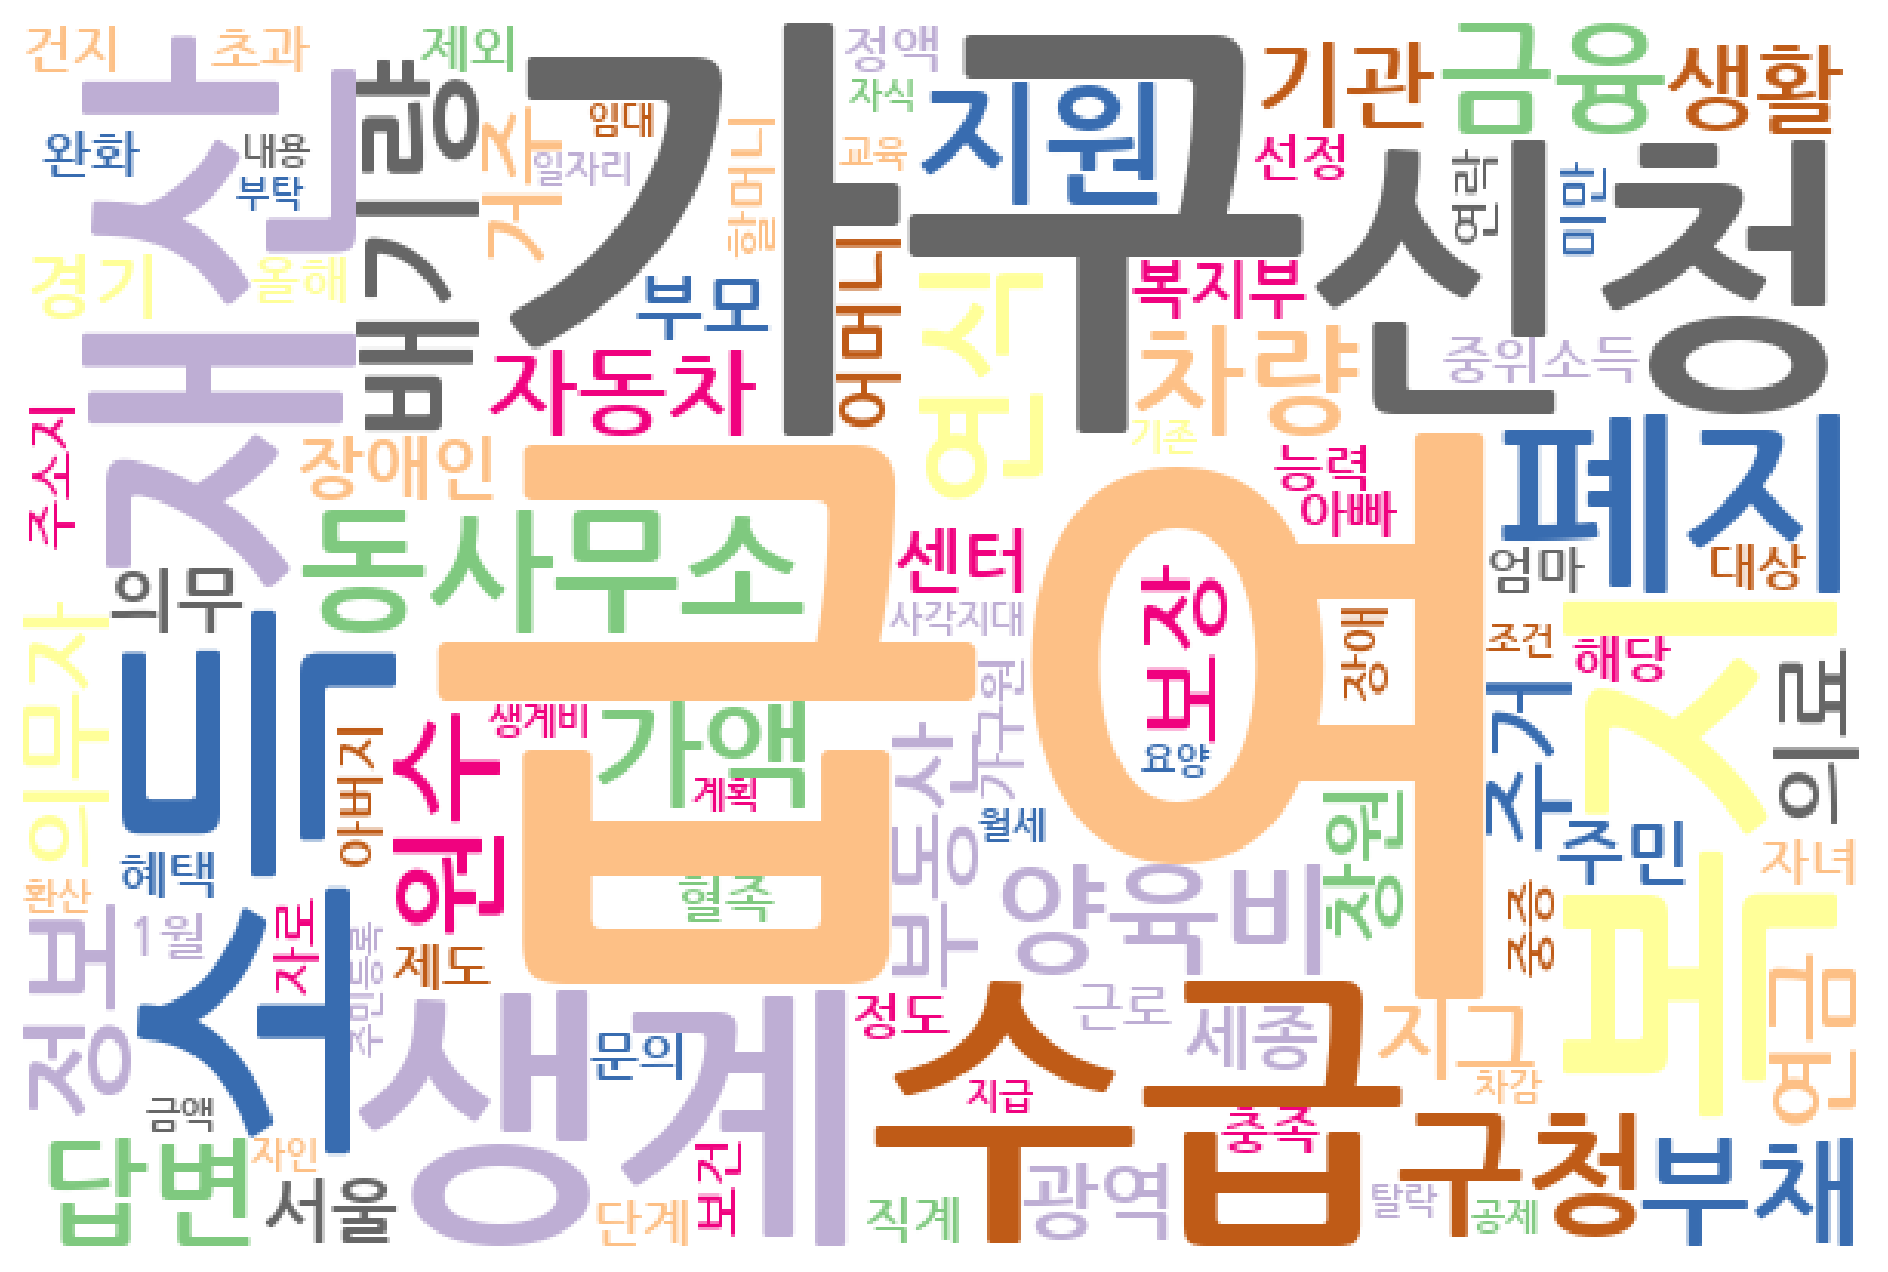

In [12]:
text = ' '.join(cluster0_list)  # 'cluster0_list'에 있는 단어들을 하나의 문자열로 연결

# 텍스트 데이터로 워드 클라우드 생성
wordcloud = WordCloud(font_path=file_path + 'nanum-gothic\\NanumGothic-Bold.ttf', background_color='white', colormap="Accent", width=600, height=400).generate(text)

# 워드 클라우드 그리기
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

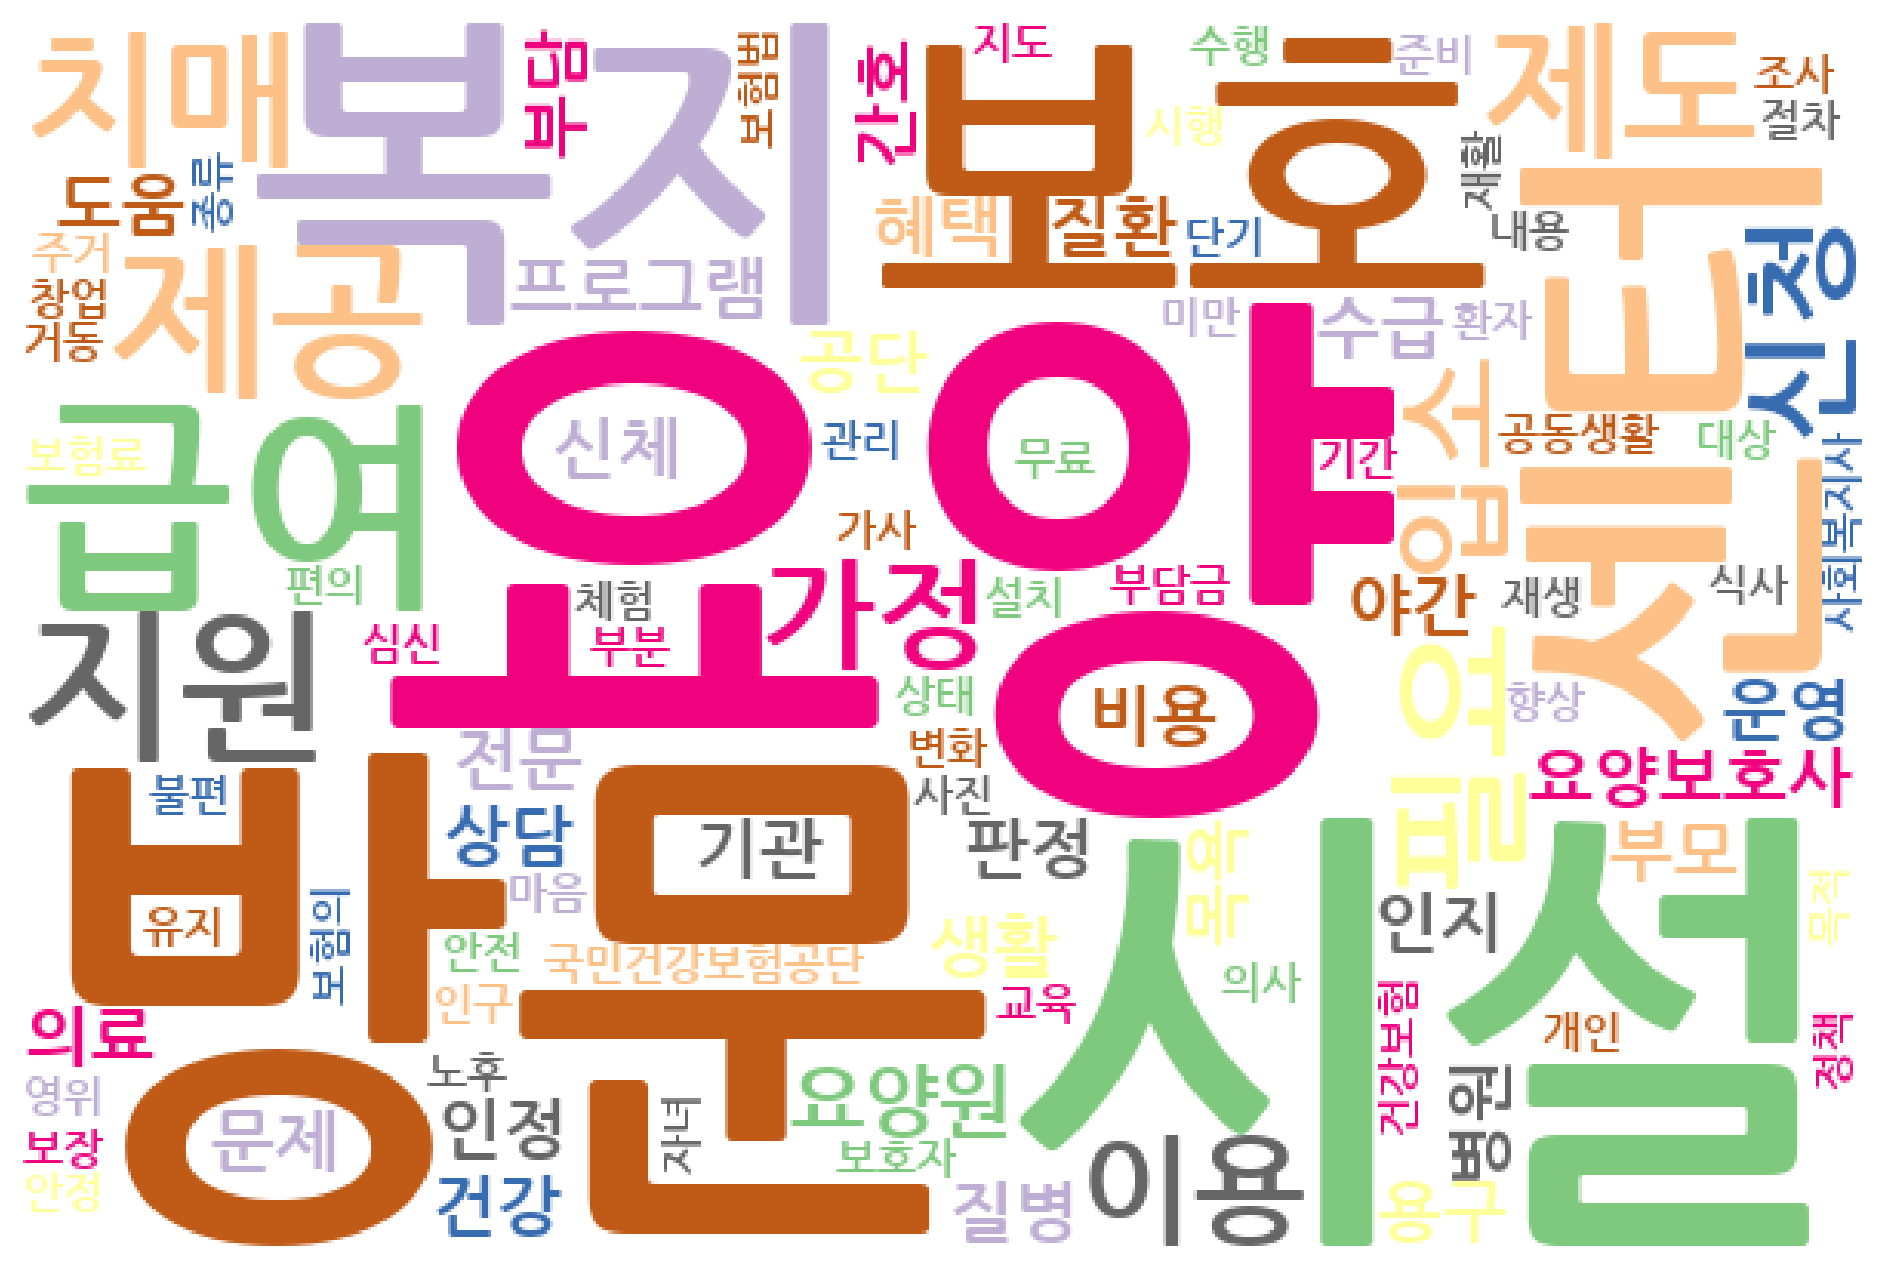

In [13]:
text = ' '.join(cluster1_list)  # 'cluster1_list'에 있는 단어들을 하나의 문자열로 연결

# 텍스트 데이터로 워드 클라우드 생성
wordcloud = WordCloud(font_path=file_path + 'nanum-gothic\\NanumGothic-Bold.ttf', background_color='white', colormap="Accent", width=600, height=400).generate(text)

# 워드 클라우드 그리기
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

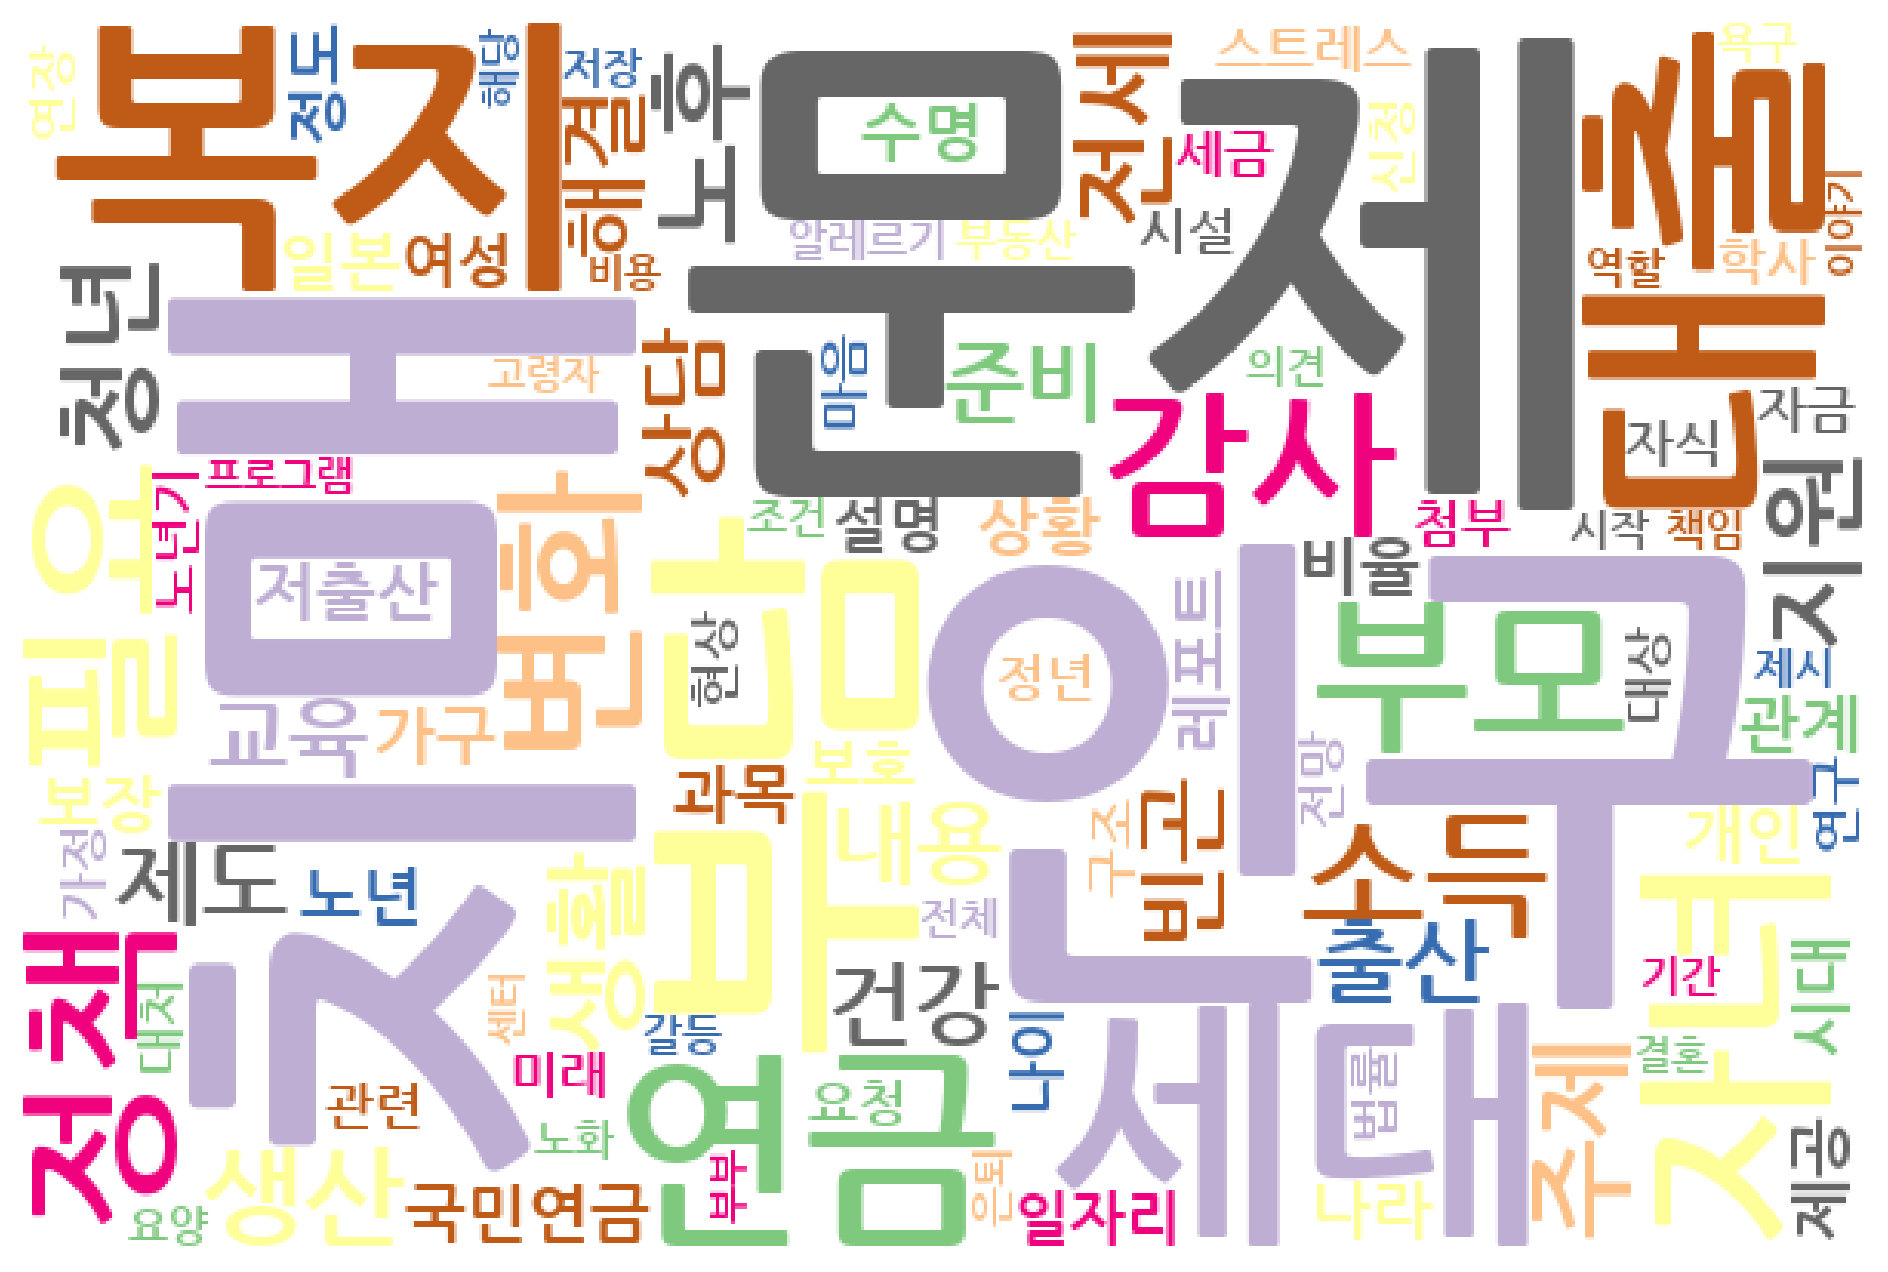

In [14]:
text = ' '.join(cluster2_list)  # 'cluster2_list'에 있는 단어들을 하나의 문자열로 연결

# 텍스트 데이터로 워드 클라우드 생성
wordcloud = WordCloud(font_path=file_path + 'nanum-gothic\\NanumGothic-Bold.ttf', background_color='white', colormap="Accent", width=600, height=400).generate(text)

# 워드 클라우드 그리기
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

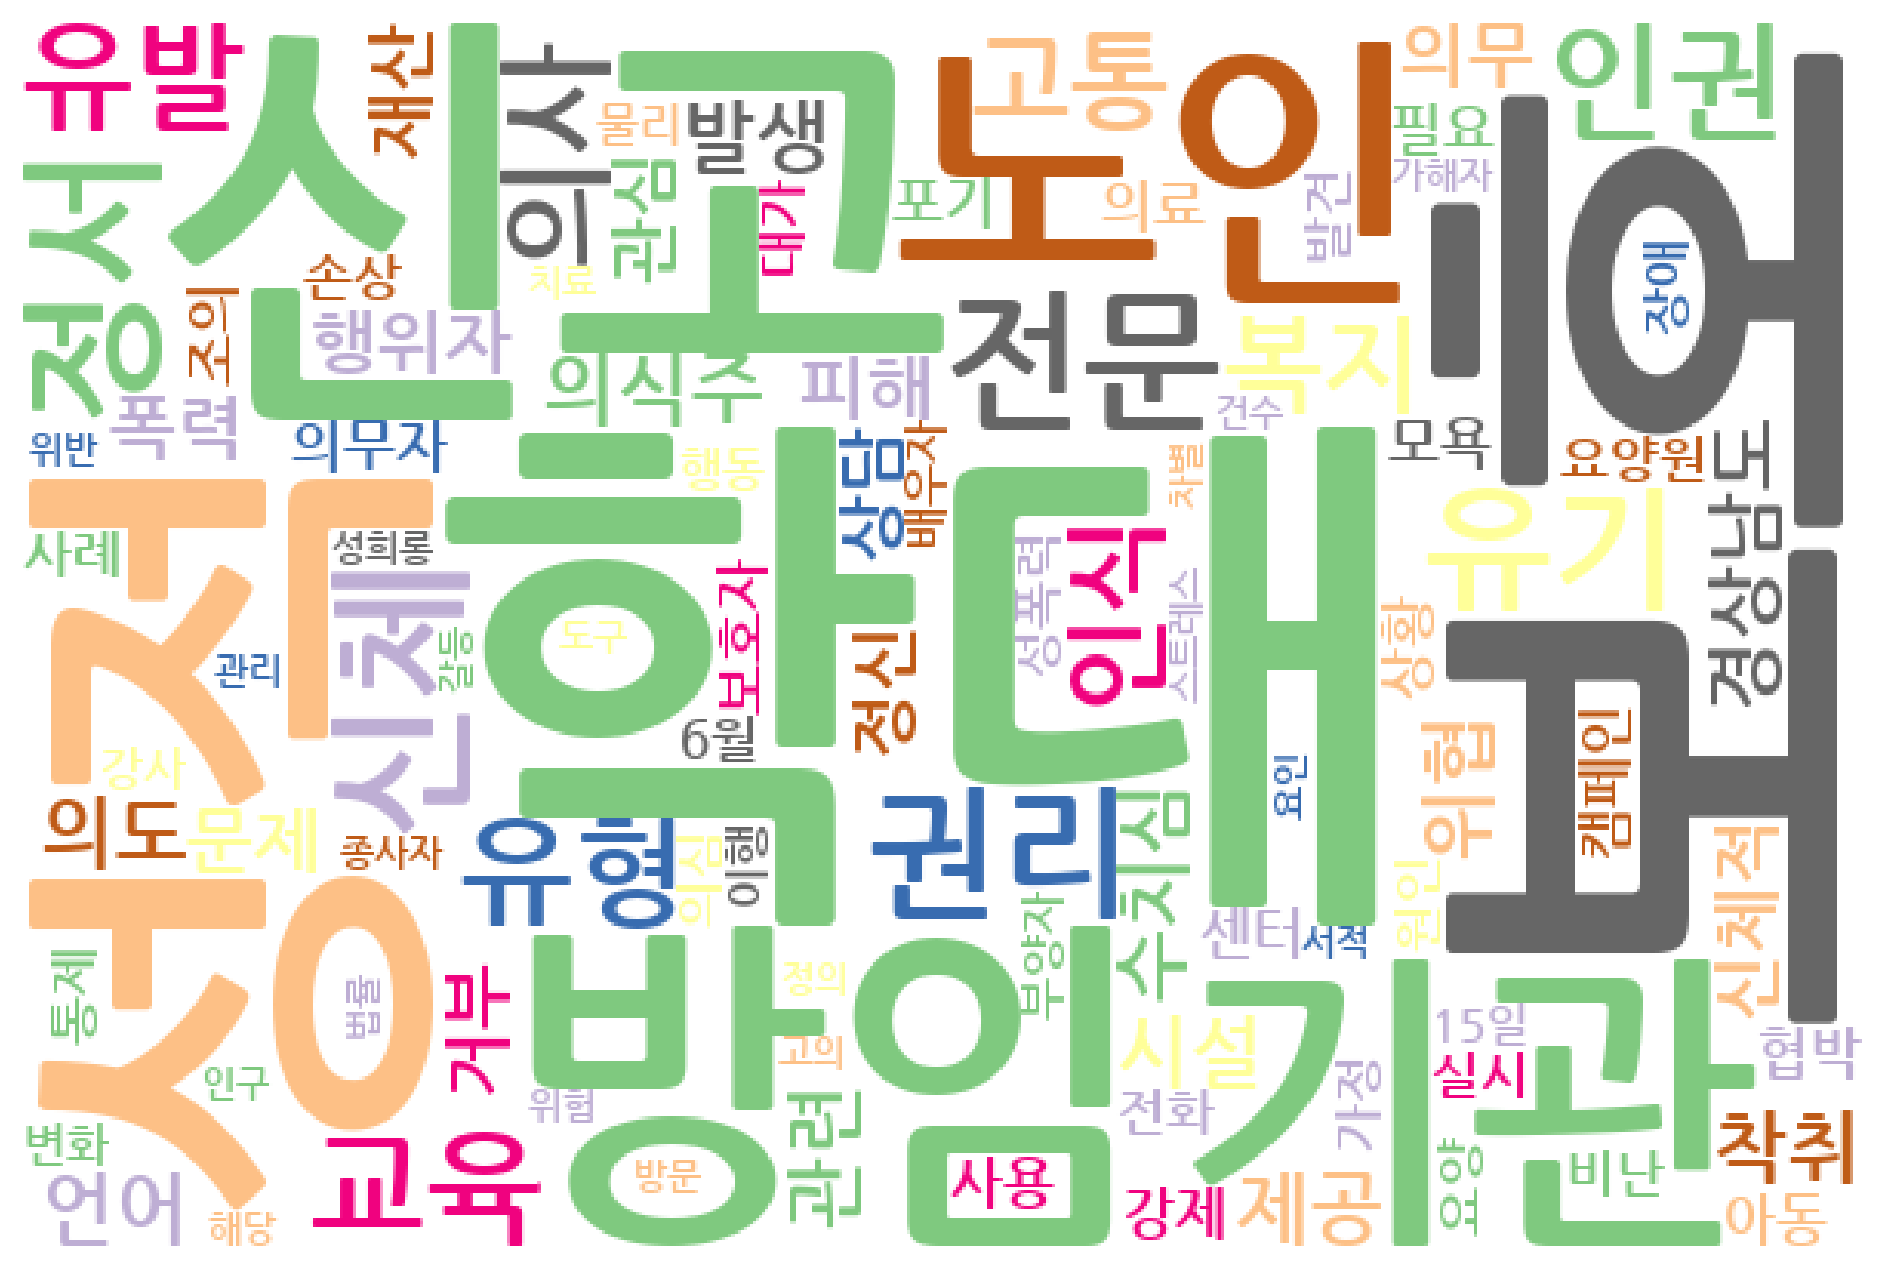

In [15]:
text = ' '.join(cluster3_list)  # 'cluster3_list'에 있는 단어들을 하나의 문자열로 연결

# 텍스트 데이터로 워드 클라우드 생성
wordcloud = WordCloud(font_path=file_path + 'nanum-gothic\\NanumGothic-Bold.ttf', background_color='white', colormap="Accent", width=600, height=400).generate(text)

# 워드 클라우드 그리기
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

### 댓글 k-mean

In [16]:
comment_noun = []
for i in range(0,len(data['comment_token_noun'])):
    # data['comment_token_noun'][i]에서 추출한 명사들을 하나의 문자열로 연결하여 comment_noun 리스트에 추가
    comment_noun.append(' '.join(data['comment_token_noun'][i]))  # 각 문서의 명사들을 str으로 연결     
    #['문서1 명사', '문서2 명사', '...']

In [17]:
# 텍스트 문서 모음을 단어 tf-idf 행렬로 변환 
vec = TfidfVectorizer(min_df = 0.01, max_df=0.95) # 문서의 1%~95%로 나타나는 단어만 고려.  
# min_df: 특정 단어가 나타나는 '문서의 수의 최소 빈도값을 설정/소수형태면 %로 설정
X = vec.fit_transform(comment_noun) # 설정한 Vectorizer로 벡터화

In [18]:
print(vec.get_feature_names_out())  # 단어 가나다 순 인덱스 

['가격' '가구' '가능' '가입' '가정' '가지' '감사' '개월' '개인' '거래' '거리' '거주' '거지' '걱정'
 '건강' '건강보험' '건지' '검색' '결혼' '계산' '계획' '고민' '고생' '고요' '공감' '공공' '공단' '공무원'
 '공부' '공유' '공제' '과정' '관계' '관련' '관리' '관심' '교육' '구조' '국민연금' '근로' '근처' '금리'
 '금액' '금융' '급여' '기간' '기분' '기사' '기억' '기존' '기회' '나라' '나머지' '나이' '나중' '날씨'
 '남편' '내용' '내일' '년대' '노년' '노력' '노령' '노후' '뉴스' '느낌' '능력' '다행' '답변' '대로'
 '대부분' '대비' '대상' '대신' '대책' '대출' '덕분' '도시' '도움' '동감' '동네' '동사무소' '동의' '라고'
 '라면' '레포트' '마음' '마지막' '만큼' '말씀' '모습' '목적' '무료' '문의' '문제' '문화' '미국' '미래'
 '반대' '발생' '발전' '방문' '배우자' '버팀목' '변경' '변화' '병원' '병원비' '보고' '보니' '보세' '보장'
 '보호' '복지' '부담' '부동산' '부모' '부부' '부분' '부양가족' '부자' '부정' '부족' '부탁' '분리' '분이'
 '불편' '비교' '비밀' '비용' '사랑' '사실' '사용' '사위' '사항' '상담' '상위' '상태' '상황' '생계'
 '생활' '서류' '서울' '선정' '선택' '설명' '세금' '세대' '세상' '센터' '소득' '소리' '소식' '소통'
 '수급' '수도' '수입' '수집' '스팅' '시기' '시대' '시설' '시작' '시장' '신경' '신고' '신분' '신청'
 '아들' '아버지' '아빠' '아이들' '아파트' '안내' '안보' '앞으로' '얘기' '어른' '어머니' '어머님' '엄마'
 '없어' '에너지' '여자' '연금' '연락' '연봉' '연소득' '영향' '예상' '예전' '예정' '

In [19]:
print(X)  # (문서인덱스, 등장단어인덱스) tf-idf값

  (1, 304)	0.2754563392087113
  (1, 21)	0.5693016407216855
  (1, 256)	0.6021052343933676
  (1, 189)	0.3049861506685686
  (1, 235)	0.2939166131190887
  (1, 230)	0.24100872641963186
  (3, 152)	1.0
  (5, 128)	1.0
  (6, 325)	1.0
  (7, 128)	1.0
  (8, 105)	0.029932602488861978
  (8, 32)	0.02934703317116039
  (8, 215)	0.0263979243803799
  (8, 106)	0.02618413771012477
  (8, 57)	0.021415451350063834
  (8, 60)	0.030360334111721957
  (8, 253)	0.02803323915051485
  (8, 311)	0.029932602488861978
  (8, 4)	0.02608025116870103
  (8, 262)	0.030823749761792134
  (8, 219)	0.026734861972335672
  (8, 199)	0.028490299433231135
  (8, 178)	0.02531244361822188
  (8, 148)	0.025978270910316167
  (8, 55)	0.029932602488861978
  :	:
  (2148, 259)	0.2745229495511224
  (2148, 94)	0.2735276411348862
  (2148, 316)	0.2587732146134186
  (2148, 33)	0.16765369626487386
  (2148, 51)	0.14892874599850234
  (2148, 230)	0.6310977614719036
  (2162, 253)	0.7148433635425651
  (2162, 308)	0.3537869812739465
  (2162, 6)	0.5049461113

1
2
3
4
5
6
7
8
9


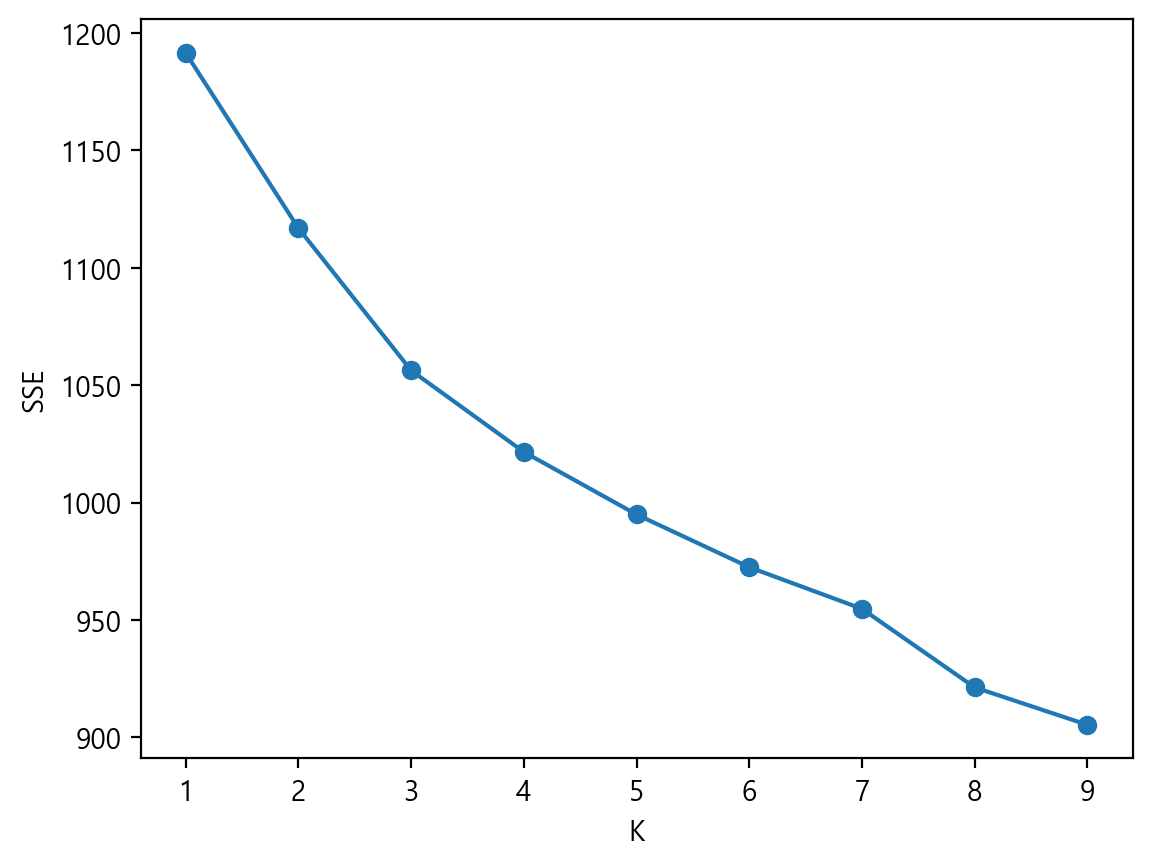

In [20]:
# 군집수가 1~9개일때로 elbow 그래프 시각화
def elbow(X):
    sse = []

    for i in range(1,10):
        km = KMeans(n_clusters=i, algorithm='auto', random_state=1)  # k-means algorithm: auto(기본값))
        km.fit(X) # k-means clustering
        sse.append(km.inertia_)
        print(i)

    # Elbow 그래프 그리기    
    plt.plot(range(1,10), sse, marker='o')
    plt.xlabel('K') # x축 레이블: 군집의 개수(K)
    plt.ylabel('SSE') # y축 레이블: sse
    plt.xticks(range(1,10)) # x축 눈금을 1~9까지 설정
    plt.show()

elbow(X)

In [21]:
# 최적의 클러스터 수(3)로 k-means 실행
from sklearn.cluster import KMeans
model = KMeans(n_clusters=3, algorithm='auto', random_state=0)
model.fit(X)

KMeans(algorithm='auto', n_clusters=3, random_state=0)

In [22]:
print("Top terms per cluster:")
# 모델의 클러스터 중심을 기준으로 각 클러스터의 중심을 정렬

terms = vec.get_feature_names_out()  # 벡터에 해당하는 단어
for i in range(3):
    print("Cluster %d:" % i)
    for ind in order_centroids[i, :100]:   # [행, 열]     # [클러스터 인덱스, 클러스터 내 인덱스]
        print(' %s' % terms[ind])   # ind: 가져온 단어 인덱스    #terms[ind]: 해당 인덱스를 가진 단어
    print('\n')

Top terms per cluster:
Cluster 0:
 감사
 정보
 하루
 도움
 스팅
 행복
 좋은
 방문
 비밀
 저녁
 덕분
 화이팅
 건강
 내용
 참고
 정리
 주말
 이웃
 정성
 공감
 즐거운
 말씀
 소식
 공유
 부탁
 필요
 급여
 응원
 연금
 마음
 요양보호사
 답변
 코로나
 편안
 앞으로
 소통
 전세
 관심
 기사
 요양
 나라
 복지
 신청
 대출
 보고
 부족
 지원
 다행
 의료
 보호
 문화
 시작
 관련
 날씨
 뉴스
 걱정
 이해
 개인
 월세
 교육
 고생
 모습
 기분
 차이
 조심
 노력
 시설
 가입
 레포트
 문제
 센터
 처음
 버팀목
 생계
 아빠
 가지
 소리
 임대
 준비
 사실
 치매
 요즘
 지식
 근처
 설명
 소득
 연봉
 자금
 부분
 완전
 취업
 요양원
 고민
 공부
 의미
 의무자
 내일
 제도
 서류
 얘기


Cluster 1:
 감사
 소득
 급여
 신청
 연금
 수급
 재산
 하루
 인구
 스팅
 생계
 문제
 필요
 레포트
 부모
 의료
 복지
 대출
 가입
 지원
 도움
 나라
 요청
 무료
 센터
 가구
 내용
 문의
 전세
 행복
 건강
 세대
 정도
 정보
 해당
 주거
 요양
 자녀
 걱정
 공감
 검색
 금액
 부탁
 안내
 학사
 상담
 장애인
 방문
 출산
 나이
 이용
 폐지
 일자리
 자식
 미래
 마음
 혜택
 거래
 청년
 노후
 병원
 말씀
 완화
 응원
 답변
 세금
 공제
 유료
 증정
 어머니
 조건
 준비
 정책
 화이팅
 제공
 상황
 의무자
 부분
 이해
 의무
 요즘
 부동산
 엄마
 임대
 교육
 자금
 수집
 생활
 지식
 계산
 버팀목
 시작
 주민
 치매
 현실
 해결
 완료
 아파트
 대상
 보니


Cluster 2:
 비밀
 스팅
 정보
 감사
 정성
 하루
 행복
 소득
 대출
 신청
 공감
 연봉
 답변
 공유
 건강
 요양
 세대
 나라
 좋은
 신경
 보고
 부탁
 건지
 차이
 시작
 병원
 방문
 내용
 기간
 모습


In [23]:
cluster0_list = [] # 클러스터 0의 상위 단어 리스트
cluster1_list = [] # 클러스터 1의 상위 단어 리스트
cluster2_list = [] # 클러스터 2의 상위 단어 리스트

for i in range(3): # 3개의 클러스터에 대해 반복
    cluster_terms = []  # 현재 클러스터의 상위 단어들을 저장할 리스트
    for ind in order_centroids[i, :100]: # 군집 중심의 상위 100개 단어에 대해 반복
        cluster_terms.append(terms[ind]) # 해당 인덱스에 해당하는 단어를 리스트에 추가
    # 현재 클러스터에 따라서 리스트를 해당하는 변수에 할당
    if i == 0: 
        cluster0_list = cluster_terms
    elif i == 1:
        cluster1_list = cluster_terms
    elif i == 2:
        cluster2_list = cluster_terms

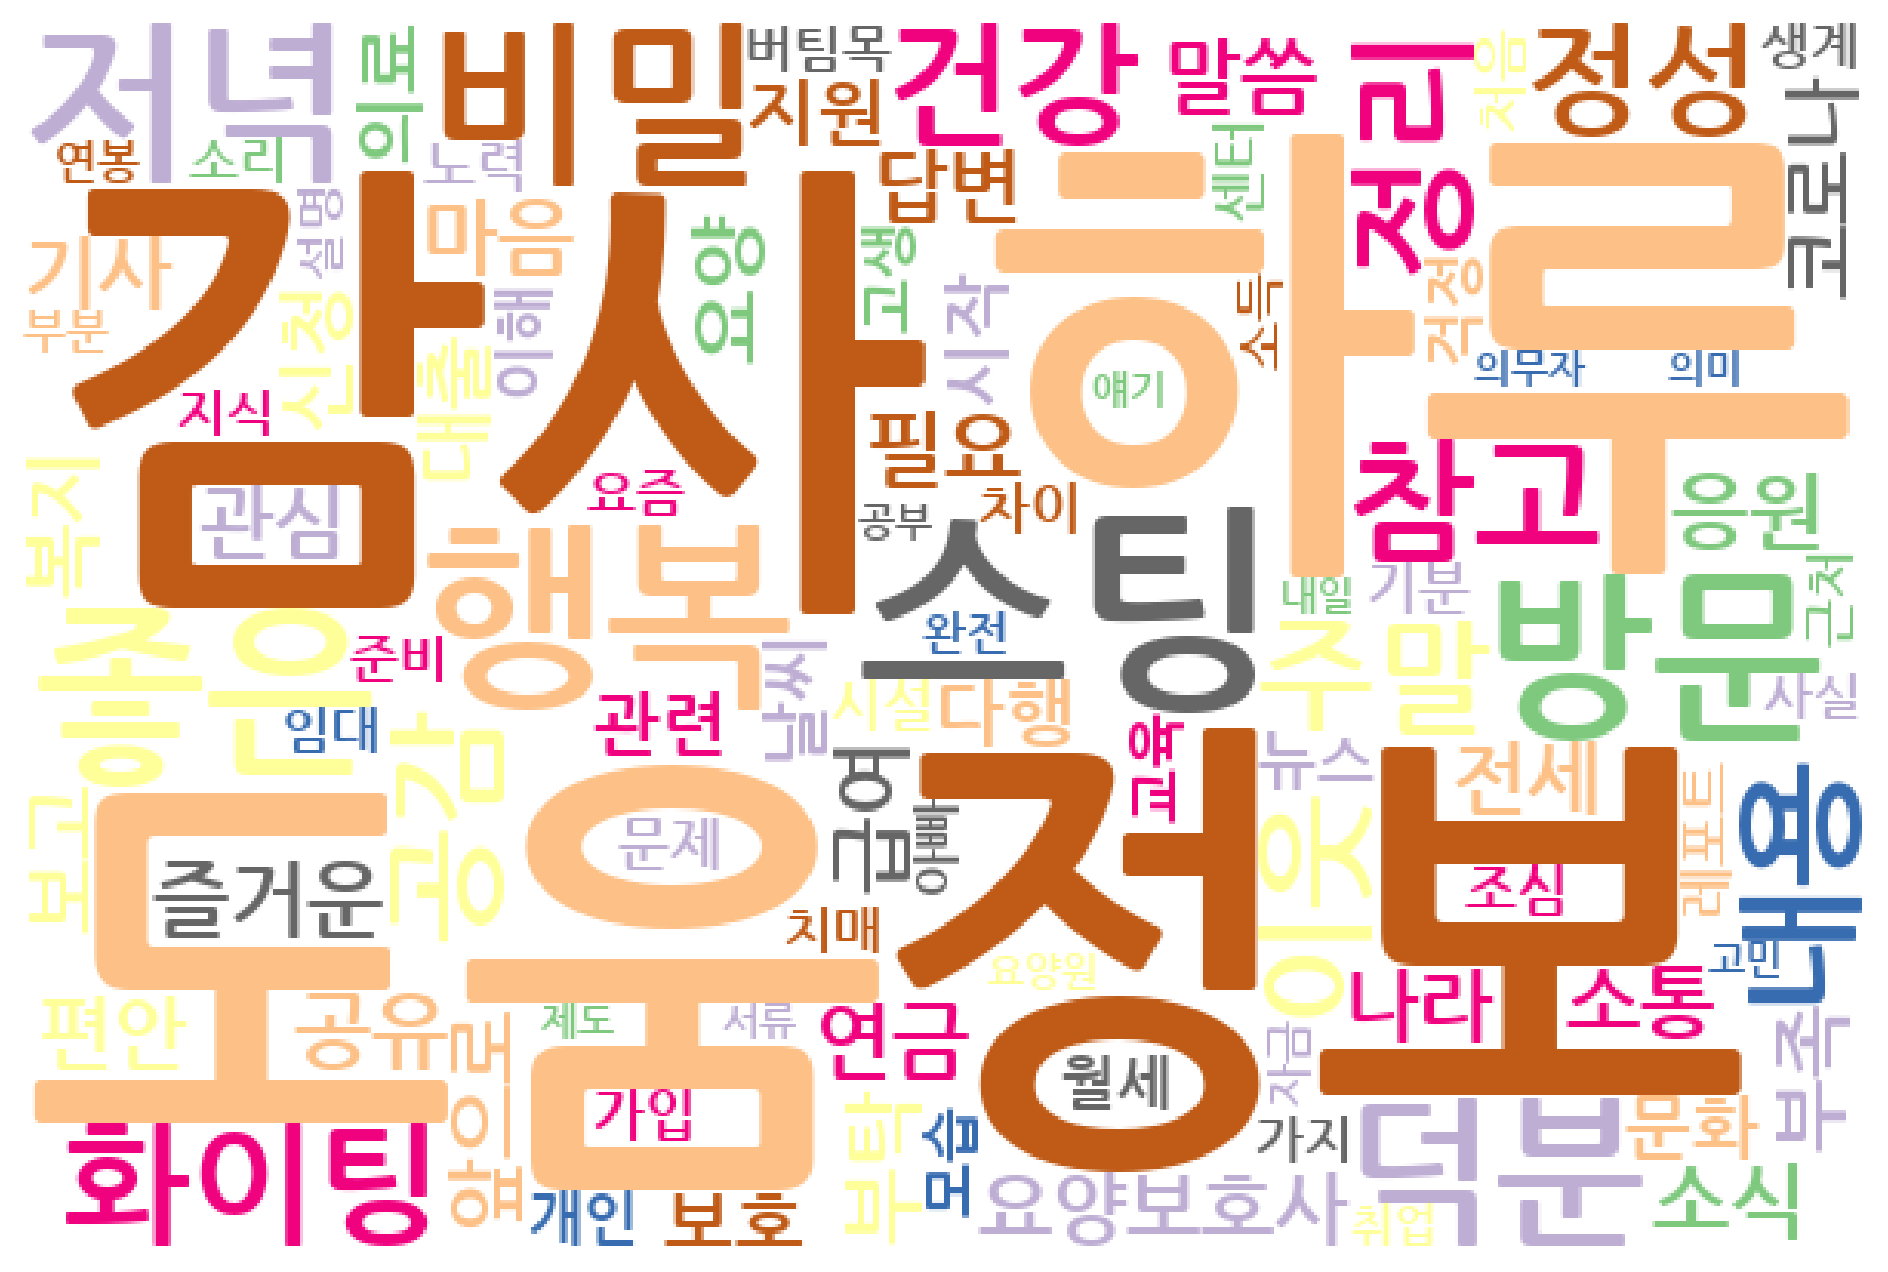

In [24]:
text = ' '.join(cluster0_list) # 'cluster0_list'에 있는 단어들을 하나의 문자열로 연결

# 텍스트 데이터로 워드 클라우드 생성
wordcloud = WordCloud(font_path=file_path + 'nanum-gothic\\NanumGothic-Bold.ttf', background_color='white', colormap="Accent", width=600, height=400).generate(text)

# 워드 클라우드 그리기
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

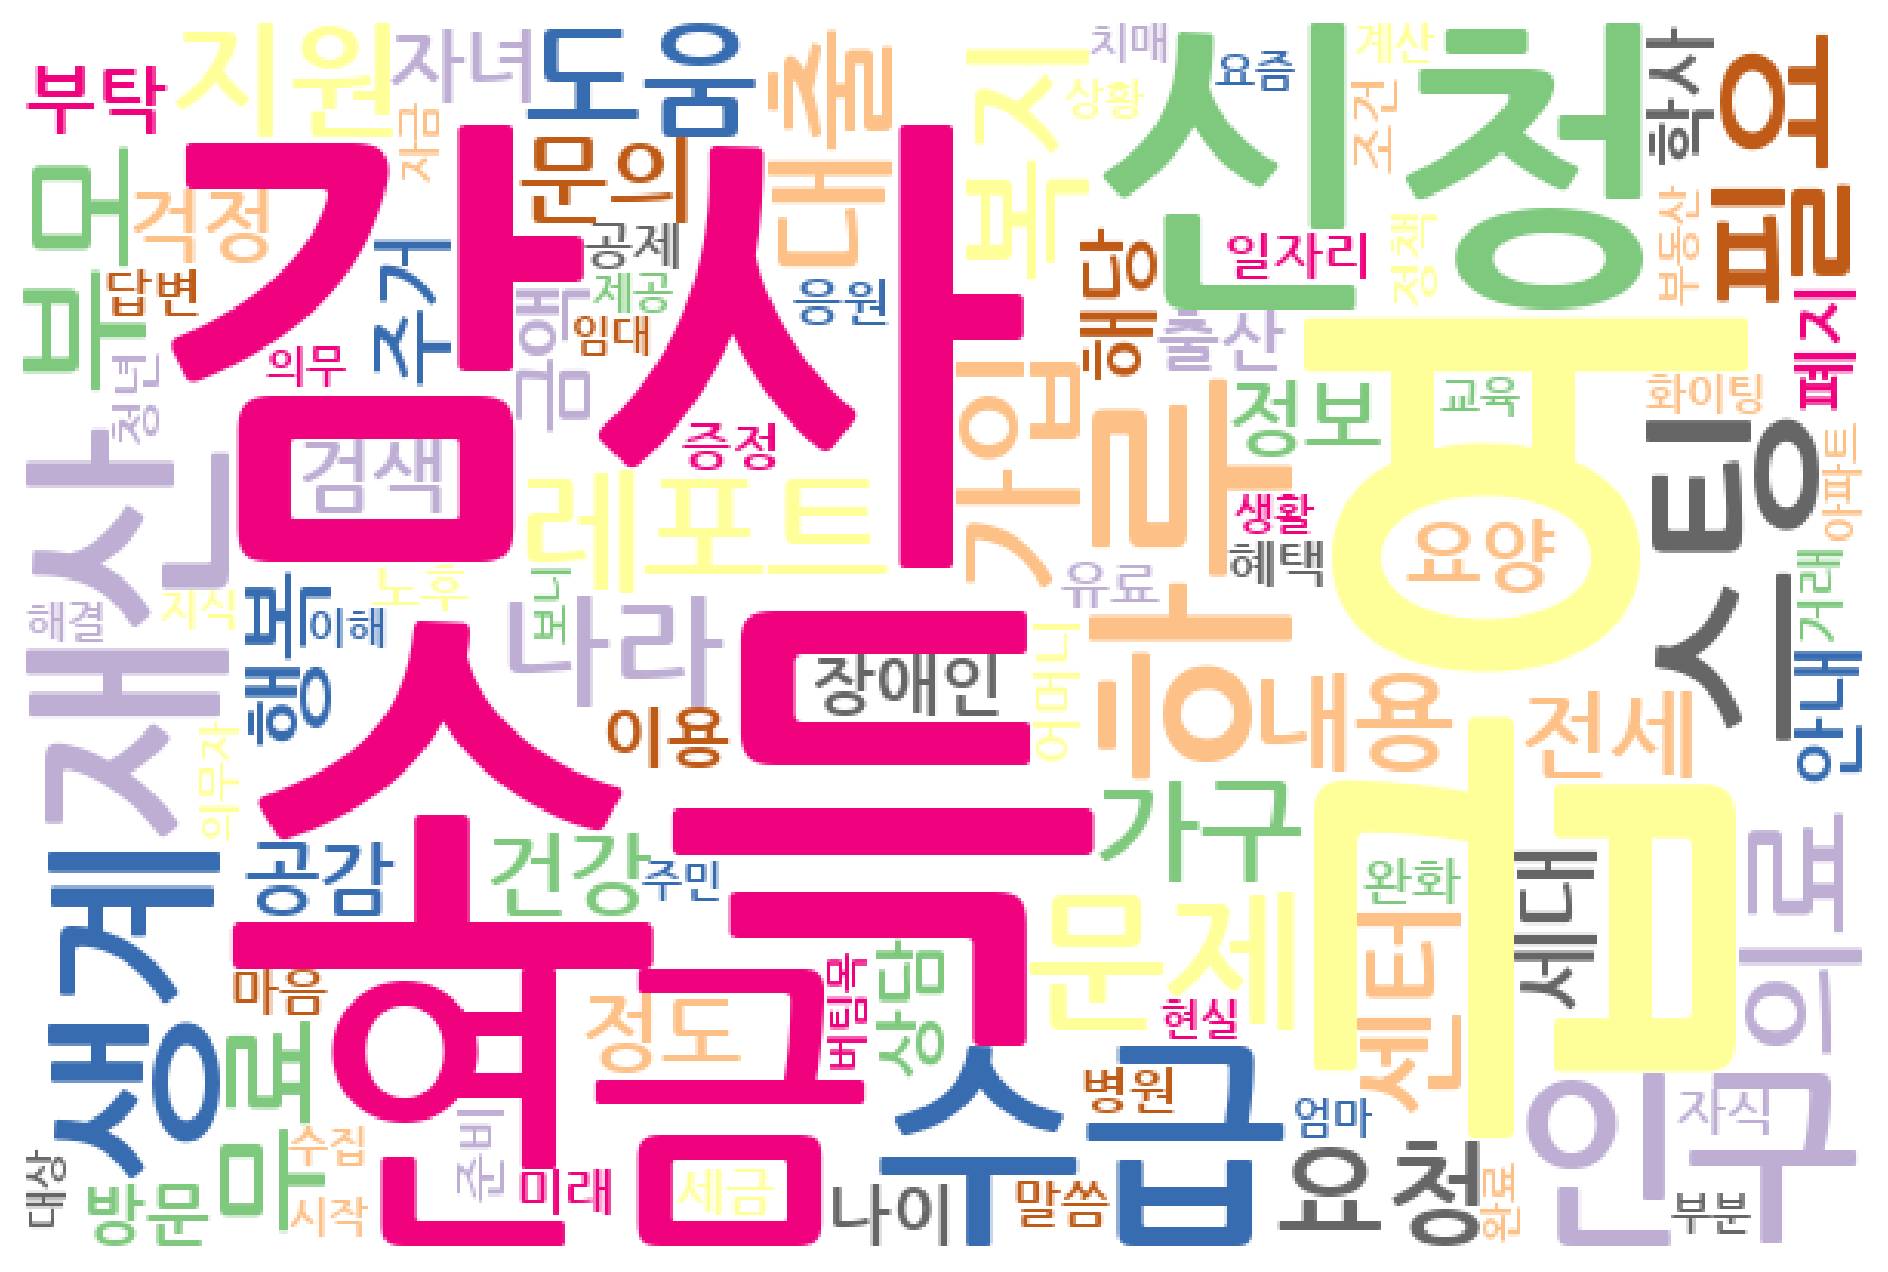

In [25]:
text = ' '.join(cluster1_list) # 'cluster1_list'에 있는 단어들을 하나의 문자열로 연결

# 텍스트 데이터로 워드 클라우드 생성
wordcloud = WordCloud(font_path=file_path + 'nanum-gothic\\NanumGothic-Bold.ttf', background_color='white', colormap="Accent", width=600, height=400).generate(text)

# 워드 클라우드 그리기
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

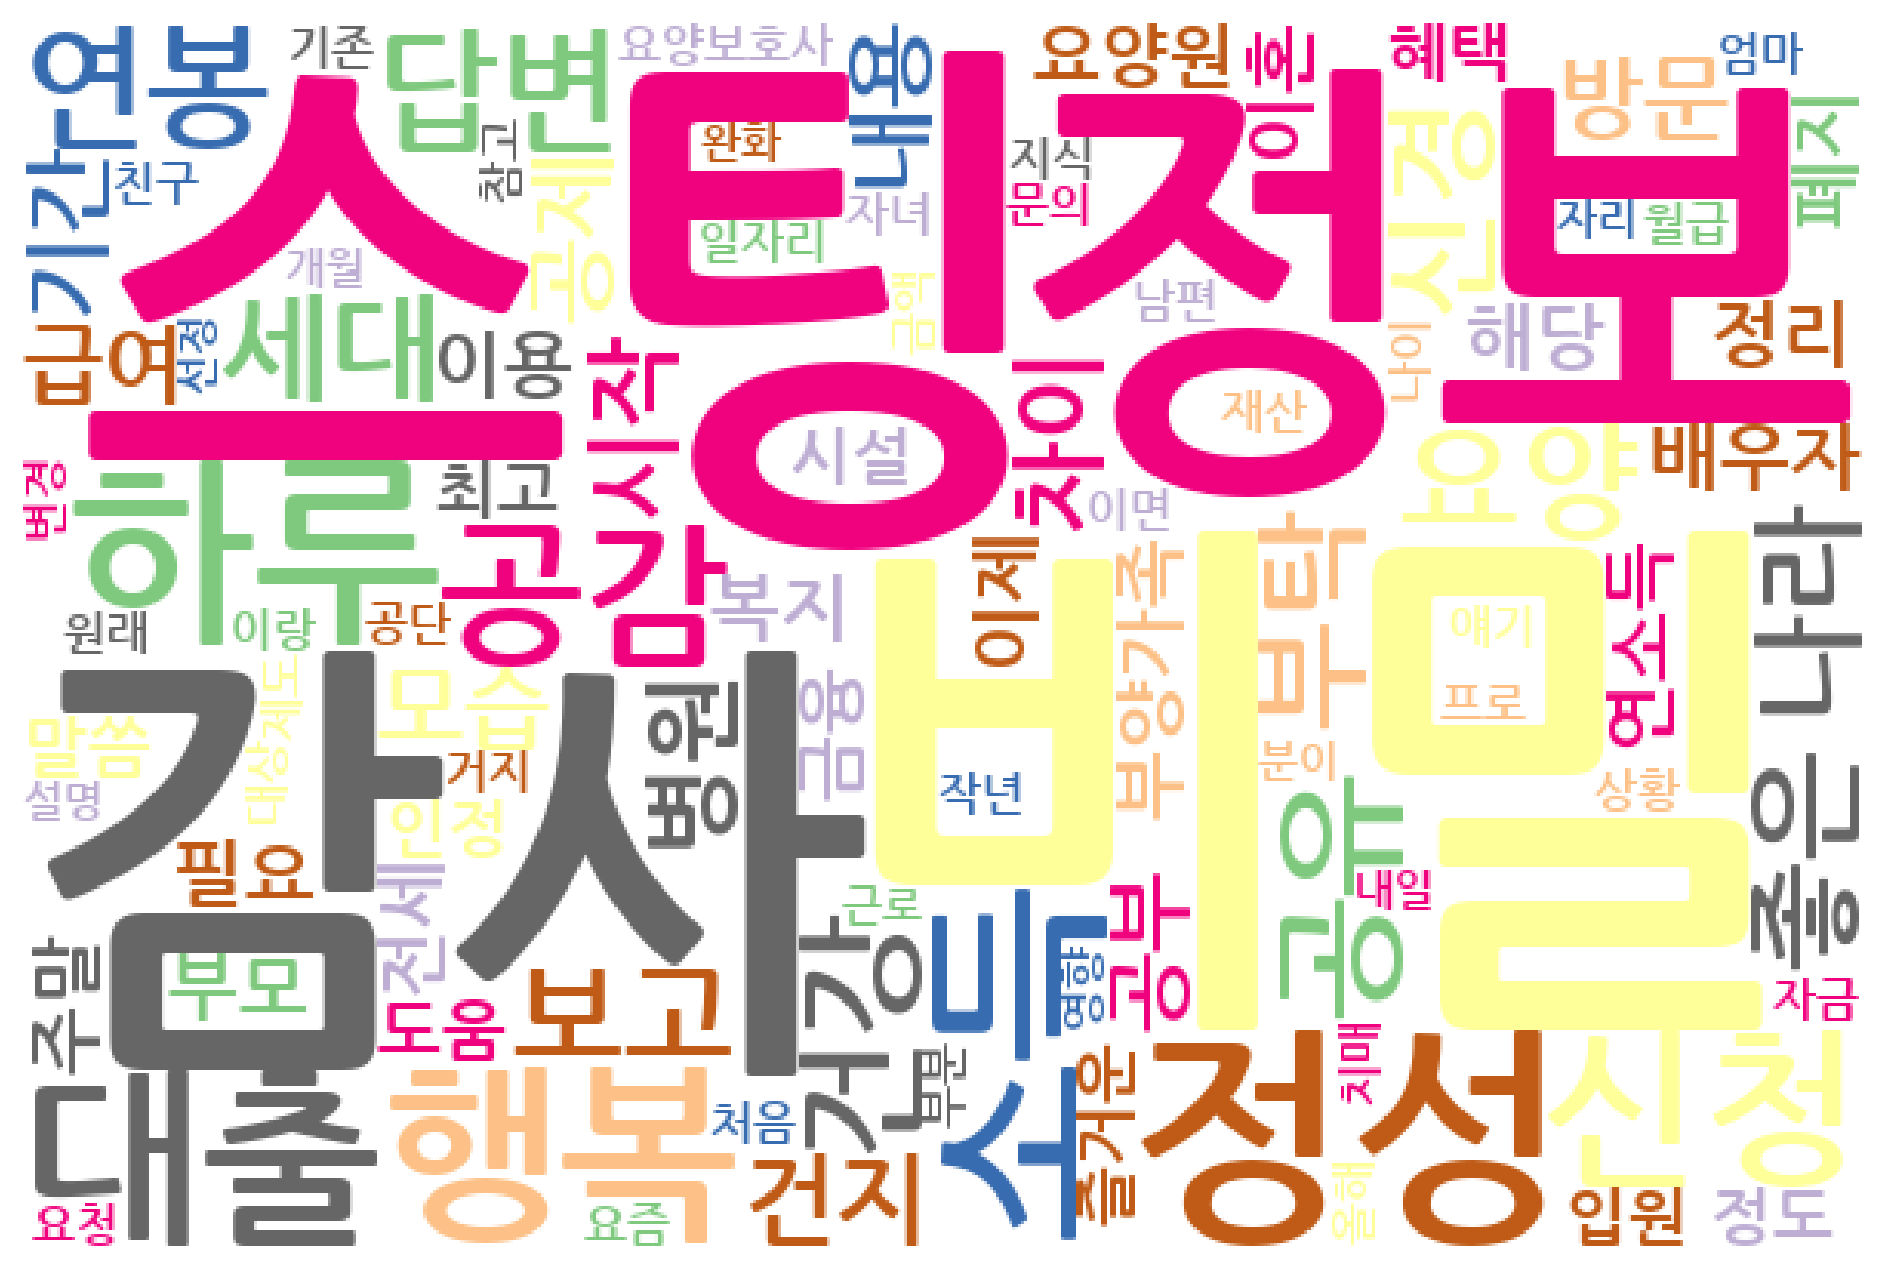

In [26]:
text = ' '.join(cluster2_list) # 'cluster2_list'에 있는 단어들을 하나의 문자열로 연결

# 텍스트 데이터로 워드 클라우드 생성
wordcloud = WordCloud(font_path=file_path + 'nanum-gothic\\NanumGothic-Bold.ttf', background_color='white', colormap="Accent", width=600, height=400).generate(text)

# 워드 클라우드 그리기
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()